In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import csv
from datetime import datetime
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from matplotlib import pyplot

In [ ]:
# data= pd.read_csv('./dianji.csv', dtype={"ip": int, "app": int,"device": int,"os": int,\
#                                          "channel": int, "is_attributed": int})
# df= pd.DataFrame(data)
df = pd.DataFrame(pd.read_csv('./dianji.csv', dtype={"ip": int, "app": int,"device": int,"os": int, "channel": int, "is_attributed": int}))
df.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,83230,3,1,13,379,2017-11-06 14:32:21,NaN,0
1,17357,3,1,19,379,2017-11-06 14:33:34,NaN,0
2,35810,3,1,13,379,2017-11-06 14:34:12,NaN,0
3,45745,14,1,13,478,2017-11-06 14:34:52,NaN,0
4,161007,3,1,13,379,2017-11-06 14:35:08,NaN,0


In [ ]:
# df.to_csv(r'.\no_duplicate_dianji.csv', index = False, header=True)

In [ ]:
# df.to_csv(r'.\no_duplicate_no_header_dianji.csv', index = False, header=False)

In [ ]:
# df.sort_values("click_time", inplace=True) #data is already sorted

In [ ]:
#span of collecting data
begin_time= df['click_time'].iloc[0]
end_time= df['click_time'].iloc[-2]
begin_time_obj= datetime.strptime(begin_time, '%Y-%m-%d %H:%M:%S')
end_time_obj= datetime.strptime(end_time, '%Y-%m-%d %H:%M:%S')

print ("this data is collected within a span of ", end_time_obj - begin_time_obj, " hours")

this data is collected within a span of  1 day, 12:33:29  hours


In [ ]:
df.drop('attributed_time', axis=1, inplace=True)
df.head()

,ip,app,device,os,channel,click_time,is_attributed
0,83230,3,1,13,379,2017-11-06 14:32:21,0
1,17357,3,1,19,379,2017-11-06 14:33:34,0
2,35810,3,1,13,379,2017-11-06 14:34:12,0
3,45745,14,1,13,478,2017-11-06 14:34:52,0
4,161007,3,1,13,379,2017-11-06 14:35:08,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79438445 entries, 0 to 79438444
Data columns (total 7 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   ip             int32 
 1   app            int32 
 2   device         int32 
 3   os             int32 
 4   channel        int32 
 5   click_time     object
 6   is_attributed  int32 
dtypes: int32(6), object(1)
memory usage: 2.4+ GB


In [ ]:
df['click_time'] = df['click_time'].str[8:] #need to be modified
df.head()

,ip,app,device,os,channel,click_time,is_attributed
0,83230,3,1,13,379,06 14:32:21,0
1,17357,3,1,19,379,06 14:33:34,0
2,35810,3,1,13,379,06 14:34:12,0
3,45745,14,1,13,478,06 14:34:52,0
4,161007,3,1,13,379,06 14:35:08,0


In [ ]:
groupdf= df.groupby(df.columns.tolist(), as_index=False).size()
groupdf.head()

,ip,app,device,os,channel,click_time,is_attributed,size
0,5,2,1,13,477,07 05:06:16,0,1
1,5,2,1,13,477,07 05:07:40,0,1
2,5,2,1,13,477,07 05:08:27,0,1
3,5,2,1,13,477,07 05:08:50,0,1
4,5,3,1,13,371,07 01:37:30,0,2


In [ ]:
# groupdf.to_csv(r'.\group_dianji.csv', index = False, header=True)

In [ ]:
groupdf.sort_values('size', inplace=True, ascending=False)

In [ ]:
groupdf.head(30)

,ip,app,device,os,channel,click_time,is_attributed,size
20091775,41692,14,1,55,123,07 03:24:43,0,24
55590994,114083,14,1,7,123,07 07:07:17,0,19
39457526,81261,14,1,7,123,07 05:49:25,0,19
50281928,103467,14,1,7,123,07 11:24:24,0,17
30908548,64222,3,1,13,280,08 02:48:44,0,16
11994110,25041,14,1,55,123,07 05:55:29,0,14
61876849,128765,14,1,55,123,07 10:35:42,0,13
23118141,47235,6,1,19,459,07 00:10:36,0,13
60424747,123994,14,1,71,123,07 07:26:16,0,13
22183138,45029,64,1,13,459,07 08:51:09,0,13


In [ ]:
groupdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77915807 entries, 20091775 to 77915806
Data columns (total 8 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   ip             int64 
 1   app            int64 
 2   device         int64 
 3   os             int64 
 4   channel        int64 
 5   click_time     object
 6   is_attributed  int64 
 7   size           int64 
dtypes: int64(7), object(1)
memory usage: 5.2+ GB


In [ ]:
unique_attributes = []
graph_columns = ['ip', 'app', 'device', 'os', 'channel']
for column in graph_columns:
    unique_attributes.append(len(groupdf[column].unique()))


In [ ]:
print (graph_columns)
print(unique_attributes)

['ip', 'app', 'device', 'os', 'channel']
[162767, 594, 2443, 596, 187]


In [ ]:
ip_download = set(groupdf.ip[groupdf.is_attributed == 1])

ip_nodownload = set(groupdf.ip[groupdf.is_attributed == 0])

#Preliminary Sus Ips
ip_sus = ip_nodownload - ip_download

print("Preliminary Sus Ips #" , len(ip_sus))

Preliminary Sus Ips # 47080


In [ ]:
group_ip_downloads_requests= df.groupby(['ip', 'is_attributed'], as_index=False).size()
group_ip_downloads_requests.head(50)

,ip,is_attributed,size
0,5,0,24
1,6,0,288
2,6,1,1
3,9,0,1718
4,9,1,3
5,10,0,738
6,10,1,2
7,19,0,666
8,19,1,3
9,20,0,1890


In [ ]:
dict_ip_downloads = {}
dict_ip_requests = {}
dict_ip_downloads_per_requests = {}

for index, row in group_ip_downloads_requests.iterrows():
    if row.is_attributed == 0:
        dict_ip_requests[row["ip"]] = row['size']
        if row["ip"] not in dict_ip_downloads:
            dict_ip_downloads[row["ip"]] = 0
    
    else:
        dict_ip_downloads[row["ip"]] = row['size']
        if  row["ip"] in dict_ip_requests:
            dict_ip_requests[row["ip"]] = dict_ip_requests[row["ip"]] + row['size']
        else:
            dict_ip_requests[row["ip"]] = row['size']
    
    dict_ip_downloads_per_requests[row["ip"]] = dict_ip_downloads[row["ip"]] / dict_ip_requests[row["ip"]]


In [ ]:
dictionaries = dict_ip_requests , dict_ip_downloads , dict_ip_downloads_per_requests

with open('ip_req_down.csv', 'w', newline='') as ofile:
    w = csv.writer(ofile, delimiter=',')
    w.writerow(['IP', 'requests', 'downloads', 'downloadsPerRequests'])
    for key, value in dict_ip_requests.items():
        w.writerow([key] + [d[key] for d in dictionaries])


In [ ]:
group_app_downloads_requests= df.groupby(['app', 'is_attributed'], as_index=False).size()

In [ ]:
group_app_downloads_requests.head(115)

,app,is_attributed,size
0,0,0,557
1,0,1,253
2,1,0,2860981
3,1,1,634
4,2,0,9211490
...,...,...,...
110,62,0,13612
111,62,1,862
112,64,0,1088993
113,64,1,257


In [ ]:
dict_app_downloads = {}
dict_app_requests = {}
dict_app_downloads_per_requests = {}

for index, row in group_app_downloads_requests.iterrows():
    if row.is_attributed == 0:
        dict_app_requests[row["app"]] = row['size']
        if row["app"] not in dict_app_downloads:
            dict_app_downloads[row["app"]] = 0
    
    else:
        dict_app_downloads[row["app"]] = row['size']
        if  row["app"] in dict_app_requests:
            dict_app_requests[row["app"]] = dict_app_requests[row["app"]] + row['size']
        else:
            dict_app_requests[row["app"]] = row['size']
    
    dict_app_downloads_per_requests[row["app"]] = dict_app_downloads[row["app"]] / dict_app_requests[row["app"]]


In [ ]:
dictionaries = dict_app_requests , dict_app_downloads , dict_app_downloads_per_requests

with open('app_req_down.csv', 'w', newline='') as ofile:
    w = csv.writer(ofile, delimiter=',')
    w.writerow(['APP', 'requests', 'downloads', 'downloadsPerRequests'])
    for key, value in dict_app_requests.items():
        w.writerow([key] + [d[key] for d in dictionaries])


In [ ]:
#device coding

In [ ]:
group_device_downloads_requests= df.groupby(['device', 'is_attributed'], as_index=False).size()

In [ ]:
group_device_downloads_requests.head(115)

,device,is_attributed,size
0,0,0,330690
1,0,1,39996
2,1,0,74693597
3,1,1,136171
4,2,0,3286301
...,...,...,...
110,58,1,27
111,59,0,9417
112,59,1,9
113,60,0,763


In [ ]:
dict_device_downloads = {}
dict_device_requests = {}
dict_device_downloads_per_requests = {}

for index, row in group_device_downloads_requests.iterrows():
    if row.is_attributed == 0:
        dict_device_requests[row["device"]] = row['size']
        if row["device"] not in dict_device_downloads:
            dict_device_downloads[row["device"]] = 0
    
    else:
        dict_device_downloads[row["device"]] = row['size']
        if  row["device"] in dict_device_requests:
            dict_device_requests[row["device"]] = dict_device_requests[row["device"]] + row['size']
        else:
            dict_device_requests[row["device"]] = row['size']
    
    dict_device_downloads_per_requests[row["device"]] = dict_device_downloads[row["device"]] / dict_device_requests[row["device"]]


In [ ]:
dictionaries = dict_device_requests , dict_device_downloads , dict_device_downloads_per_requests

with open('device_req_down.csv', 'w', newline='') as ofile:
    w = csv.writer(ofile, delimiter=',')
    w.writerow(['device', 'requests', 'downloads', 'downloadsPerRequests'])
    for key, value in dict_device_requests.items():
        w.writerow([key] + [d[key] for d in dictionaries])


In [ ]:
#os

In [ ]:
group_os_downloads_requests= df.groupby(['os', 'is_attributed'], as_index=False).size()

In [ ]:
group_os_downloads_requests.head(115)

,os,is_attributed,size
0,0,0,116553
1,0,1,15120
2,1,0,940470
3,1,1,1309
4,2,0,284532
...,...,...,...
110,59,0,8330
111,59,1,459
112,60,0,6086
113,61,0,173


In [ ]:
dict_os_downloads = {}
dict_os_requests = {}
dict_os_downloads_per_requests = {}

for index, row in group_os_downloads_requests.iterrows():
    if row.is_attributed == 0:
        dict_os_requests[row["os"]] = row['size']
        if row["os"] not in dict_os_downloads:
            dict_os_downloads[row["os"]] = 0
    
    else:
        dict_os_downloads[row["os"]] = row['size']
        if  row["os"] in dict_os_requests:
            dict_os_requests[row["os"]] = dict_os_requests[row["os"]] + row['size']
        else:
            dict_os_requests[row["os"]] = row['size']
    
    dict_os_downloads_per_requests[row["os"]] = dict_os_downloads[row["os"]] / dict_os_requests[row["os"]]


In [ ]:
dictionaries = dict_os_requests , dict_os_downloads , dict_os_downloads_per_requests

with open('os_req_down.csv', 'w', newline='') as ofile:
    w = csv.writer(ofile, delimiter=',')
    w.writerow(['os', 'requests', 'downloads', 'downloadsPerRequests'])
    for key, value in dict_os_requests.items():
        w.writerow([key] + [d[key] for d in dictionaries])


In [ ]:
#channel

In [ ]:
group_channel_downloads_requests= df.groupby(['channel', 'is_attributed'], as_index=False).size()

In [ ]:
group_channel_downloads_requests.head(115)

,channel,is_attributed,size
0,0,0,602
1,0,1,45
2,3,0,403575
3,3,1,150
4,4,0,325
...,...,...,...
110,205,1,270
111,208,0,97493
112,208,1,40
113,210,0,19801


In [ ]:
dict_channel_downloads = {}
dict_channel_requests = {}
dict_channel_downloads_per_requests = {}

for index, row in group_channel_downloads_requests.iterrows():
    if row.is_attributed == 0:
        dict_channel_requests[row["channel"]] = row['size']
        if row["channel"] not in dict_channel_downloads:
            dict_channel_downloads[row["channel"]] = 0
    
    else:
        dict_channel_downloads[row["channel"]] = row['size']
        if  row["channel"] in dict_channel_requests:
            dict_channel_requests[row["channel"]] = dict_channel_requests[row["channel"]] + row['size']
        else:
            dict_channel_requests[row["channel"]] = row['size']
    
    dict_channel_downloads_per_requests[row["channel"]] = dict_channel_downloads[row["channel"]] / dict_channel_requests[row["channel"]]


In [ ]:
dictionaries = dict_channel_requests , dict_channel_downloads , dict_channel_downloads_per_requests

with open('channel_req_down.csv', 'w', newline='') as ofile:
    w = csv.writer(ofile, delimiter=',')
    w.writerow(['channel', 'requests', 'downloads', 'downloadsPerRequests'])
    for key, value in dict_channel_requests.items():
        w.writerow([key] + [d[key] for d in dictionaries])


In [ ]:
#composite features Yet to come 
#device and app

group_devapp_downloads_requests= df.groupby(['app','device', 'is_attributed'], as_index=False).size()
group_devapp_downloads_requests.head(40)

,app,device,is_attributed,size
0,0,0,0,366
1,0,0,1,110
2,0,4,1,2
3,0,6,0,2
4,0,6,1,5
5,0,7,0,4
6,0,7,1,3
7,0,9,0,1
8,0,9,1,2
9,0,11,0,2


In [ ]:
group_devapp_downloads_requests.sort_values('size', ascending=False, inplace=True)

In [ ]:
group_devapp_downloads_requests.head(15)

,app,device,is_attributed,size
182,3,1,0,13043508
243,12,1,0,10200190
174,2,1,0,8762505
264,15,1,0,7589614
283,18,1,0,5979860
222,9,1,0,5536636
256,14,1,0,4438791
167,1,1,0,2705268
250,13,1,0,1961522
215,8,1,0,1593445


In [ ]:
print(dict_device_requests[1])
print(dict_device_downloads[1])
print(dict_device_downloads_per_requests[1]* 100)

74829768
136171
0.18197437148275


## Here we can see that Device Type 1 has 74 million requests out of the total 77 million (after accounting for duplicates)

In [ ]:
dev_1_apps=group_devapp_downloads_requests[group_devapp_downloads_requests.device==1]
dev_1_apps.head(200)

,app,device,is_attributed,size
182,3,1,0,13043508
243,12,1,0,10200190
174,2,1,0,8762505
264,15,1,0,7589614
283,18,1,0,5979860
...,...,...,...,...
6357,90,1,1,58
8993,224,1,0,57
3460,28,1,1,55
4680,65,1,1,55


In [ ]:
dev1_downloads = {}
dev1_requests = {}
dev1_downloads_per_requests = {}

for index, row in group_app_downloads_requests.iterrows():
    if row.is_attributed == 0:
        dev1_requests[row["app"]] = row['size']
        if row["app"] not in dev1_downloads:
            dev1_downloads[row["app"]] = 0
    
    else:
        dev1_downloads[row["app"]] = row['size']
        if  row["app"] in dev1_requests:
            dev1_requests[row["app"]] = dev1_requests[row["app"]] + row['size']
        else:
            dev1_requests[row["app"]] = row['size']
    
    dev1_downloads_per_requests[row["app"]] = dev1_downloads[row["app"]] / dev1_requests[row["app"]]


In [ ]:
dictionaries = dev1_requests , dev1_downloads , dev1_downloads_per_requests

with open('dev1_apps_req_down.csv', 'w', newline='') as ofile:
    w = csv.writer(ofile, delimiter=',')
    w.writerow(['app', 'requests', 'downloads', 'downloadsPerRequests'])
    for key, value in dev1_requests.items():
        w.writerow([key] + [d[key] for d in dictionaries])


In [ ]:
# dev1_apps_list = list(dev1_downloads_per_requests.values())


bias_threshold = 120

dev1_apps_list = []
for key, value in dev1_requests.items():
    if value > bias_threshold: #remove all apps from dev 1 that had less than 150 clicks to avoid biasing the model
        dev1_apps_list.append(dev1_downloads_per_requests[key])

index_list = np.arange(len(dev1_apps_list))


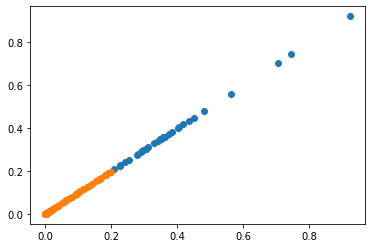

[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1
 1 0 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1
 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1
 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1
 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1]


In [ ]:
X = np.array(dev1_apps_list).reshape(-1,1)
# define the model
model = KMeans(n_clusters=2)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 0])
# show the plot
pyplot.show()
print (yhat)


In [ ]:
cluster_fraud = []
cluster_real = []
count=0
for pt in yhat:
    if pt==0:
        cluster_fraud.append(dev1_apps_list[count])
    else: 
        cluster_real.append(dev1_apps_list[count])
    count=count+1
print (len(cluster_fraud))

33


In [ ]:
print("The cutoff is: ", np.array(cluster_fraud).max())

The cutoff is:  0.9222614840989399


In [ ]:
blocklist_dev1=[]
for key, value in dev1_downloads_per_requests.items():
    if value <= 0.19730679156908665 and dev1_requests[key] > bias_threshold:
        blocklist_dev1.append(key)

print(blocklist_dev1)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 36, 37, 38, 42, 43, 45, 46, 47, 49, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 64, 65, 67, 68, 69, 73, 74, 75, 76, 78, 80, 81, 82, 83, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 99, 100, 101, 102, 103, 104, 107, 109, 110, 111, 112, 114, 117, 118, 119, 121, 122, 123, 124, 125, 128, 130, 133, 134, 136, 137, 140, 141, 142, 143, 146, 148, 149, 150, 151, 152, 154, 158, 160, 161, 162, 165, 166, 168, 170, 171, 172, 176, 177, 181, 182, 183, 184, 185, 186, 188, 192, 193, 194, 197, 200, 202, 203, 204, 206, 207, 208, 210, 211, 213, 215, 216, 218, 220, 222, 229, 231, 232, 233, 240, 241, 244, 247, 250, 251, 265, 266, 267, 268, 272, 273, 283, 293, 296, 303, 310, 315, 320, 347, 363, 365, 381, 394, 398, 401, 407, 419, 425, 481, 484, 512, 536, 537, 538, 541, 542, 548, 552, 556]


### The above are the apps that, when associated with device 1, are suspected to be most fraudulent